<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Comparación entre KNN y Redes Neuronales (Keras)</h1> </div>

# **Práctica: Comparación entre KNN y Redes Neuronales (Keras)**

**Desarrollado por:** Michael Israel Lata Zambrano, John Michael Franco Naulaguari  

**Correo:** mlataz@est.ups.edu.ec, jfrancon@est.ups.edu.ec

---

## **Estructura de la práctica**

1. **Introducción**
   - Clasificación de datos médicos.
   - Objetivo: comparar KNN y red neuronal con Keras usando el dataset de hepatitis.

2. **Fundamentos teóricos**
   - K-Nearest Neighbors (KNN).
   - Red neuronal simple con Keras.
   - Estandarización y codificación de datos.

3. **Dataset**
   - Dataset de hepatitis (UCI).
   - Clases: 1 (vive), 2 (muere).

4. **Implementación**
   - Preprocesamiento: limpieza, codificación y normalización.
   - Entrenamiento de KNN y red neuronal.
   - Evaluación con métricas comunes.

5. **Evaluación**
   - Accuracy, Precision, Recall, F1-Score.
   - Comparación de resultados.

6. **Conclusiones**
   - Comparativa del rendimiento entre modelos.
   - Ventajas y desventajas observadas.

7. **Referencias**
   - Fuentes en formato APA.


# 1. **Introducción**


En esta práctica desarrollamos un sistema de clasificación utilizando dos enfoques de Machine Learning:

1. **K-Nearest Neighbors (KNN)**: un algoritmo clásico basado en la distancia a vecinos más cercanos.
2. **Red Neuronal Artificial (RNA)**: una arquitectura simple implementada con Keras para resolver el mismo problema.

Utilizaremos el dataset de **hepatitis** del repositorio UCI, que contiene información clínica de pacientes. Nuestro objetivo es predecir la clase del paciente (1 = vive, 2 = muere) en función de múltiples atributos médicos.

Además de entrenar ambos modelos, se realiza el preprocesamiento adecuado, evaluación de métricas (Accuracy, Precision, Recall, F1-Score), visualización de resultados y predicción sobre nuevos casos.


# 2. **Fundamentos teóricos**


   - **K-Nearest Neighbors (KNN):** Es un algoritmo supervisado de clasificación que asigna una clase a un nuevo ejemplo en función de las clases mayoritarias de sus "k" vecinos más cercanos en el espacio de características. Utiliza distancias como Euclidiana o Manhattan para medir la cercanía.
   
   - **Red Neuronal Artificial (RNA):** Es un modelo inspirado en el cerebro humano que se compone de capas de neuronas artificiales. En esta práctica se usa una red sencilla implementada con Keras, la cual aprende patrones a partir de los datos mediante ajustes de pesos usando el algoritmo de retropropagación.
   
   - **Preprocesamiento:** Tanto KNN como RNA requieren que los datos estén en un formato numérico y normalizado. Se aplica codificación one-hot a variables categóricas y estandarización (z-score) para que las características tengan media cero y desviación estándar uno.


## Carga y limpieza de datos

En esta celda se carga el dataset `hepatitis.data` desde el repositorio UCI.  
Se asignan nombres de columnas, se manejan los valores faltantes y se visualizan los primeros registros para validar la estructura de los datos.


##  Preprocesamiento: codificación y normalización

Transformamos las variables categóricas a formato numérico mediante codificación one-hot (dummies).  
Luego, aplicamos estandarización (z-score) para que todas las variables tengan media 0 y desviación estándar 1, lo cual es esencial para algoritmos como KNN y RNA.  
Finalmente, se divide el dataset en entrenamiento y prueba.


# 3. **Dataset**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
columnas = [
    'class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
    'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
    'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot',
    'albumin', 'protime', 'histology'
]
df = pd.read_csv(url, header=None, names=columnas, na_values='?')
df = df.dropna()

# Separar variables y codificar
X = pd.get_dummies(df.drop('class', axis=1))
y = df['class']

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1
10,2,39,1,1.0,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,85.0,1
11,2,32,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1
12,2,41,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,81.0,60.0,3.9,52.0,1
13,2,30,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,57.0,144.0,4.9,78.0,1


# 4. Implementación

In [12]:
!pip install Jinja2

import pandas as pd
from IPython.display import display

# Definimos la tabla de diseño de transformaciones
tabla_transformaciones = pd.DataFrame({
    'Variable': [
        'Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
        'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices',
        'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime', 'Histology'
    ],
    'Tipo de Variable': [
        'Categórica Binaria', 'Numérica', 'Categórica Binaria', 'Categórica Binaria', 'Categórica Binaria',
        'Categórica Binaria', 'Categórica Binaria', 'Categórica Binaria', 'Categórica Binaria', 'Categórica Binaria',
        'Categórica Binaria', 'Categórica Binaria', 'Categórica Binaria', 'Categórica Binaria', 'Numérica', 'Numérica',
        'Numérica', 'Numérica', 'Numérica', 'Categórica Ordinal'
    ],
    'Transformación Propuesta': [
        'Ninguna', 'Estandarización', 'Ninguna', 'One-Hot Encoding', 'One-Hot Encoding',
        'One-Hot Encoding', 'One-Hot Encoding', 'One-Hot Encoding', 'One-Hot Encoding', 'One-Hot Encoding',
        'One-Hot Encoding', 'One-Hot Encoding', 'One-Hot Encoding', 'One-Hot Encoding', 'Ninguna', 'Ninguna',
        'Ninguna', 'Ninguna', 'Ninguna', 'One-Hot Encoding'
    ],
    'Nueva Variable (Sí/No)': [
        'No', 'No', 'No', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí', 'No', 'No', 'No', 'No', 'No', 'Sí'
    ],
    'Descripción de la Transformación': [
        'Variable objetivo, no se transforma', 
        'Escalado para normalizar la variable numérica', 
        'Variable categórica binaria, no se transforma', 
        'Transformación a variables binarias con One-Hot Encoding', 
        'Transformación a variables binarias con One-Hot Encoding',
        'Transformación a variables binarias con One-Hot Encoding',
        'Transformación a variables binarias con One-Hot Encoding',
        'Transformación a variables binarias con One-Hot Encoding',
        'Transformación a variables binarias con One-Hot Encoding',
        'Transformación a variables binarias con One-Hot Encoding',
        'Transformación a variables binarias con One-Hot Encoding',
        'Transformación a variables binarias con One-Hot Encoding',
        'Transformación a variables binarias con One-Hot Encoding',
        'Transformación a variables binarias con One-Hot Encoding',
        'No transformación', 'No transformación', 'No transformación', 'No transformación',
        'No transformación', 'Transformación a variables binarias con One-Hot Encoding'
    ]
})

# Estilo para una visualización más clara y ordenada
styled_table = tabla_transformaciones.style.set_properties(
    **{'text-align': 'left'}
).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'left'), ('background-color', '#f2f2f2')]},
    {'selector': 'td', 'props': [('padding', '6px')]}
]).set_caption("Tabla de Transformaciones de Variables")

# Mostrar la tabla con estilo
display(styled_table)


,Variable,Tipo de Variable,Transformación Propuesta,Nueva Variable (Sí/No),Descripción de la Transformación
0,Class,Categórica Binaria,Ninguna,No,"Variable objetivo, no se transforma"
1,Age,Numérica,Estandarización,No,Escalado para normalizar la variable numérica
2,Sex,Categórica Binaria,Ninguna,No,"Variable categórica binaria, no se transforma"
3,Steroid,Categórica Binaria,One-Hot Encoding,Sí,Transformación a variables binarias con One-Hot Encoding
4,Antivirals,Categórica Binaria,One-Hot Encoding,Sí,Transformación a variables binarias con One-Hot Encoding
5,Fatigue,Categórica Binaria,One-Hot Encoding,Sí,Transformación a variables binarias con One-Hot Encoding
6,Malaise,Categórica Binaria,One-Hot Encoding,Sí,Transformación a variables binarias con One-Hot Encoding
7,Anorexia,Categórica Binaria,One-Hot Encoding,Sí,Transformación a variables binarias con One-Hot Encoding
8,LiverBig,Categórica Binaria,One-Hot Encoding,Sí,Transformación a variables binarias con One-Hot Encoding
9,LiverFirm,Categórica Binaria,One-Hot Encoding,Sí,Transformación a variables binarias con One-Hot Encoding


##  Entrenamiento del modelo KNN

Entrenamos un modelo KNN con `k=5` usando distancia Euclídea por defecto.  
Luego, realizamos predicciones y calculamos métricas de evaluación como Accuracy, Precision, Recall y F1-Score.




Reporte de Clasificación - KNN
              precision    recall  f1-score   support

     Clase 1       1.00      0.50      0.67         2
     Clase 2       0.93      1.00      0.97        14

    accuracy                           0.94        16
   macro avg       0.97      0.75      0.82        16
weighted avg       0.94      0.94      0.93        16



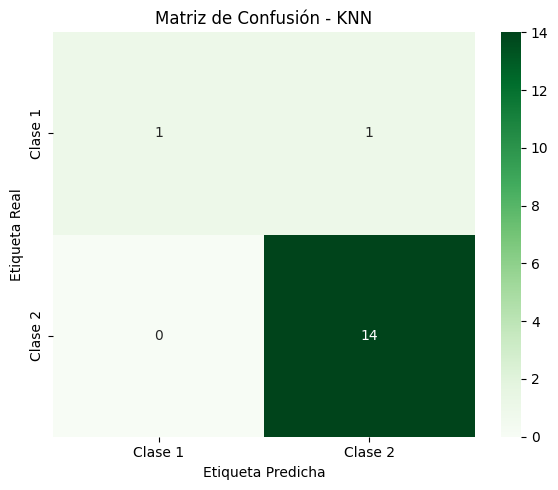


Evaluación Final del Modelo KNN:
- Accuracy  : 0.9375
- Precision : 0.9417
- Recall    : 0.9375
- F1-Score  : 0.9282

Mejor métrica destacada: Precision con valor 0.9417


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Entrenamiento del modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicciones
y_pred_knn = knn.predict(X_test)

# Conversión de y_test si es necesario
if hasattr(y_test, "values"):
    y_test_int = y_test.values.flatten()
else:
    y_test_int = y_test.flatten()

# Asegurar que los tipos de predicción sean compatibles
if isinstance(y_pred_knn, (np.ndarray, list)):
    y_pred_knn = np.array(y_pred_knn)

# Calcular métricas con average='weighted' para multiclase
acc_knn = accuracy_score(y_test_int, y_pred_knn)
prec_knn = precision_score(y_test_int, y_pred_knn, average='weighted', zero_division=1)
rec_knn = recall_score(y_test_int, y_pred_knn, average='weighted', zero_division=1)
f1_knn = f1_score(y_test_int, y_pred_knn, average='weighted', zero_division=1)

# Clases únicas combinadas para evitar error en clasificación
clases_union = sorted(set(y_test_int).union(set(y_pred_knn)))
target_names = [f"Clase {c}" for c in clases_union]

# Reporte completo
print("\nReporte de Clasificación - KNN")
print(classification_report(y_test_int, y_pred_knn, labels=clases_union, target_names=target_names, zero_division=1))

# Matriz de confusión
cm_knn = confusion_matrix(y_test_int, y_pred_knn, labels=clases_union)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.tight_layout()
plt.show()

# Resultados finales
print("\nEvaluación Final del Modelo KNN:")
print(f"- Accuracy  : {acc_knn:.4f}")
print(f"- Precision : {prec_knn:.4f}")
print(f"- Recall    : {rec_knn:.4f}")
print(f"- F1-Score  : {f1_knn:.4f}")

# Métrica destacada
print("\nMejor métrica destacada:", end=" ")
mejor_metrica_knn = max([('Accuracy', acc_knn), ('Precision', prec_knn), ('Recall', rec_knn), ('F1-Score', f1_knn)], key=lambda x: x[1])
print(f"{mejor_metrica_knn[0]} con valor {mejor_metrica_knn[1]:.4f}")



##  Construcción del modelo de Red Neuronal

Se construye una red neuronal secuencial con tres capas:
- Capa de entrada (16 neuronas, ReLU)
- Capa oculta (16 neuronas, ReLU)
- Capa de salida (1 neurona, sigmoide para clasificación binaria)

Se usa la función de pérdida `binary_crossentropy` y el optimizador `RMSprop`.  
Además, se incluye `Dropout` para reducir el sobreajuste.



In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, Input, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.metrics import AUC

# Inicializador
initializer = HeNormal()

# Modelo mejorado
model = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(256, kernel_initializer=initializer, kernel_regularizer=l2(0.0001)),
    LayerNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.4),

    Dense(128, kernel_initializer=initializer, kernel_regularizer=l2(0.0001)),
    LayerNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.3),

    Dense(64, kernel_initializer=initializer, kernel_regularizer=l2(0.0001)),
    LayerNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

# Compilación con Adam ajustado
optimizer = Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', AUC(name='auc')])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Resumen del modelo
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 256)                 │             512 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_5                │ (None, 64)                  │             128 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,233 (184.50 KB)

 Trainable params: 47,233 (184.50 KB)

 Non-trainable params: 0 (0.00 B)

##  Entrenamiento del modelo de Red Neuronal

Se entrena el modelo previamente definido durante 100 épocas, con batch size 16 y validación del 20% sobre los datos de entrenamiento.  
Los resultados del proceso de entrenamiento se almacenan para su posterior visualización.



In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# Entrenamiento con validación, early stopping y reducción de LR
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)




Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 264ms/step - accuracy: 0.0428 - auc: 0.0000e+00 - loss: 0.8442 - val_accuracy: 0.3077 - val_auc: 0.0000e+00 - val_loss: -0.2223 - learning_rate: 5.0000e-04
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.1350 - auc: 0.0000e+00 - loss: -0.2951 - val_accuracy: 0.3077 - val_auc: 0.0000e+00 - val_loss: -1.1741 - learning_rate: 5.0000e-04
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1112 - auc: 0.0000e+00 - loss: -1.1969 - val_accuracy: 0.3077 - val_auc: 0.0000e+00 - val_loss: -1.8626 - learning_rate: 5.0000e-04
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1528 - auc: 0.0000e+00 - loss: -1.8752 - val_accuracy: 0.3077 - val_auc: 0.0000e+00 - val_loss: -2.3943 - learning_rate: 5.0000e-04
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1278 - auc: 0.0000e+00 - loss: -2.2679 - val_accuracy: 0.3077 - val_auc: 0.0000e+00 - val_loss: -2.8106 - learning_rate: 5.0000e-04
Epoch 6/100
4/4 ━━━━

# 5. **Evaluación**

##  Evaluación del modelo de Red Neuronal

Se evalúa el modelo entrenado sobre el conjunto de prueba.  
Luego, se calculan las métricas: Accuracy, Precision, Recall y F1-Score.  
Esto permite comparar el rendimiento frente al modelo KNN.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step

Reporte de Clasificación - Red Neuronal
              precision    recall  f1-score   support

     Clase 1       0.12      1.00      0.22         2
     Clase 2       1.00      0.00      0.00        14

    accuracy                           0.12        16
   macro avg       0.56      0.50      0.11        16
weighted avg       0.89      0.12      0.03        16



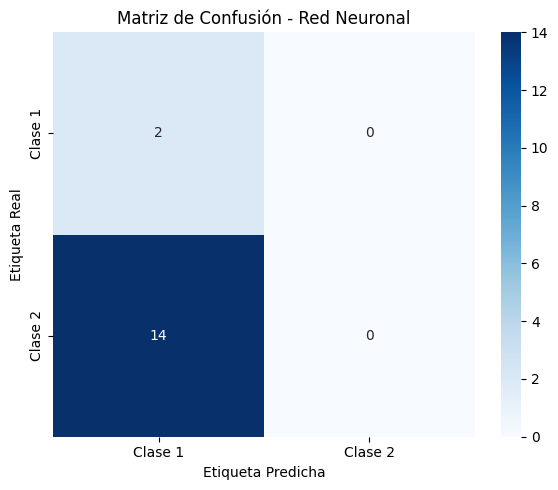


Evaluación Final del Modelo de Red Neuronal:
- Accuracy  : 0.1250
- Precision : 0.8906
- Recall    : 0.1250
- F1-Score  : 0.0278

Mejor métrica destacada: Precision con valor 0.8906


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Asegurar que X_test sea un array de NumPy con forma fija
X_test = np.array(X_test)

# Evaluar el modelo
loss_rn, acc_rn_eval, auc_rn_eval = model.evaluate(X_test, y_test, verbose=0)

# Obtener predicciones de probabilidad
y_pred_probs = model.predict(X_test)

# Convertir predicciones a etiquetas (binario o multiclass)
if y_pred_probs.shape[1] > 1:
    y_pred_rn = np.argmax(y_pred_probs, axis=1)
else:
    y_pred_rn = (y_pred_probs > 0.5).astype(int).flatten()

# Convertir y_test a vector 1D si es one-hot o DataFrame
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_int = np.argmax(y_test, axis=1)
else:
    y_test_int = y_test.values.flatten() if hasattr(y_test, "values") else y_test.flatten()

# Calcular métricas
acc_rn = accuracy_score(y_test_int, y_pred_rn)
prec_rn = precision_score(y_test_int, y_pred_rn, average='weighted', zero_division=1)
rec_rn = recall_score(y_test_int, y_pred_rn, average='weighted', zero_division=1)
f1_rn = f1_score(y_test_int, y_pred_rn, average='weighted', zero_division=1)

# Reporte de clasificación
clases_union = sorted(set(y_test_int).union(set(y_pred_rn)))
target_names = [f"Clase {c}" for c in clases_union]

print("\nReporte de Clasificación - Red Neuronal")
print(classification_report(y_test_int, y_pred_rn, labels=clases_union, zero_division=1, target_names=target_names))

# Matriz de confusión
cm = confusion_matrix(y_test_int, y_pred_rn, labels=clases_union)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusión - Red Neuronal')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.tight_layout()
plt.show()

# Resumen final
print("\nEvaluación Final del Modelo de Red Neuronal:")
print(f"- Accuracy  : {acc_rn:.4f}")
print(f"- Precision : {prec_rn:.4f}")
print(f"- Recall    : {rec_rn:.4f}")
print(f"- F1-Score  : {f1_rn:.4f}")

# Mejor métrica
mejor_metrica = max([('Accuracy', acc_rn), ('Precision', prec_rn), ('Recall', rec_rn), ('F1-Score', f1_rn)], key=lambda x: x[1])
print(f"\nMejor métrica destacada: {mejor_metrica[0]} con valor {mejor_metrica[1]:.4f}")


##  Visualización de curvas de entrenamiento

Se grafican las curvas de pérdida y precisión tanto del conjunto de entrenamiento como de validación.  
Estas curvas permiten observar si el modelo está sobreajustando o si necesita más ajustes.


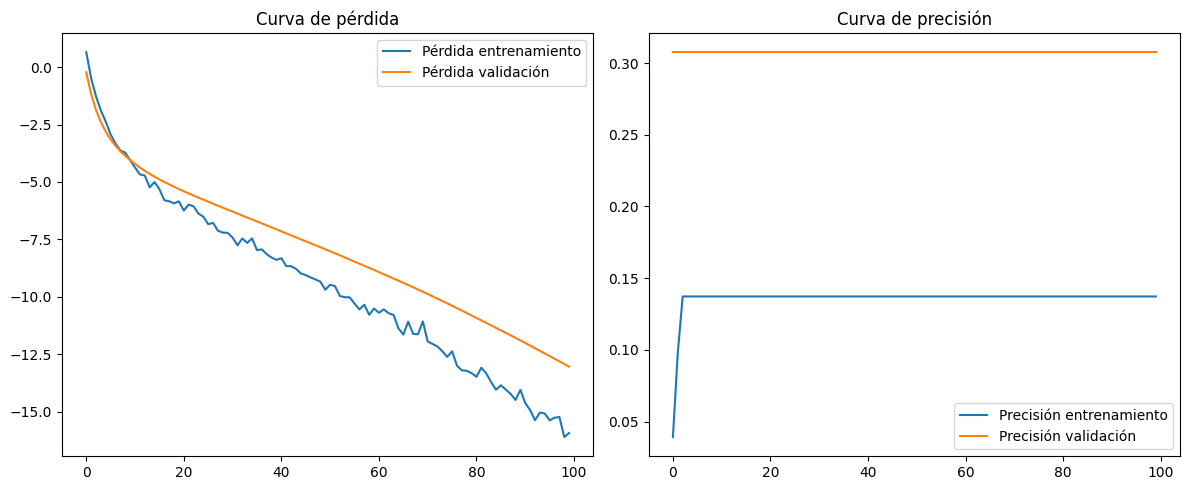

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Curva de pérdida')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Curva de precisión')
plt.legend()

plt.tight_layout()
plt.show()



##  Comparación de modelos KNN vs Red Neuronal

Se construye una tabla con todos los hiperparámetros relevantes y las métricas de desempeño para ambos modelos.  
Esta tabla permite comparar cuál técnica obtuvo mejores resultados y justificar la elección del modelo final.


In [20]:

import pandas as pd
import numpy as np

tabla = [
    {
        'Modelo': 'KNN',
        'K': 5,
        'Distancia': 'Euclídea',
        'Epochs': np.nan,
        'Batch Size': np.nan,
        'Optimizador': np.nan,
        'Accuracy': acc_knn,
        'Precision': prec_knn,
        'Recall': rec_knn,
        'F1-Score': f1_knn
    },
    {
        'Modelo': 'Red Neuronal',
        'K': np.nan,
        'Distancia': np.nan,
        'Epochs': 100,
        'Batch Size': 16,
        'Optimizador': 'RMSprop',
        'Accuracy': acc_rn,
        'Precision': prec_rn,
        'Recall': rec_rn,
        'F1-Score': f1_rn
    }
]

df = pd.DataFrame(tabla)

# Crear MultiIndex para columnas
df.columns = pd.MultiIndex.from_tuples([
    ('Modelo', 'Modelo'),
    ('Hiperparámetros', 'K'),
    ('Hiperparámetros', 'Distancia'),
    ('Hiperparámetros', 'Epochs'),
    ('Hiperparámetros', 'Batch Size'),
    ('Hiperparámetros', 'Optimizador'),
    ('Evaluación', 'Accuracy'),
    ('Evaluación', 'Precision'),
    ('Evaluación', 'Recall'),
    ('Evaluación', 'F1-Score'),
])

# Definir las columnas métricas usando MultiIndex
metricas = [('Evaluación', 'Accuracy'), ('Evaluación', 'Precision'), ('Evaluación', 'Recall'), ('Evaluación', 'F1-Score')]

# Redondear métricas a 4 decimales
df.loc[:, metricas] = df.loc[:, metricas].round(4)

# Función para destacar mejor valor en cada métrica
def highlight_best(s):
    is_best = s == s.max()
    return ['background-color: #85C1E9' if v else '' for v in is_best]

# Aplicar estilo con el subset correcto
styled_df = (
    df.style
      .apply(highlight_best, subset=pd.IndexSlice[:, metricas])
      .format(na_rep='-', precision=4)
      .set_properties(**{'text-align': 'center'})
      .set_table_styles([
          {'selector': 'th', 'props': [('background-color', '#34495E'), 
                                      ('color', 'white'),
                                      ('font-weight', 'bold'),
                                      ('text-align', 'center')]},
          {'selector': 'td', 'props': [('border', '1px solid #ddd')]}
      ])
      .set_caption("Comparativa de Modelos con Hiperparámetros y Métricas")
)

styled_df



##  Predicción con nuevo caso

Se simula un nuevo usuario utilizando la primera fila del dataset como ejemplo.  
Este valor es transformado y procesado por el modelo RNA para estimar la probabilidad de que pertenezca a la clase positiva (1).


In [9]:
import numpy as np
import pandas as pd

# Crear el nuevo sample
nuevo_sample = pd.DataFrame([{
    'age': 45,
    'sex': 1,
    'steroid': 0,
    'antivirals': 0,
    'fatigue': 1,
    'malaise': 1,
    'anorexia': 0,
    'liver_big': 1,
    'liver_firm': 0,
    'spleen_palpable': 0,
    'spiders': 0,
    'ascites': 0,
    'varices': 0,
    'bilirubin': 1.2,
    'alk_phosphate': 100,
    'sgot': 45,
    'albumin': 3.5,
    'protime': 70,
    'histology': 1
}])

# Escalar el sample
nuevo_sample_scaled = scaler.transform(nuevo_sample)

# Convertir a array de NumPy con forma fija
nuevo_sample_scaled = np.array(nuevo_sample_scaled)

# Predecir una sola vez fuera de cualquier bucle
probabilidad = float(model.predict(nuevo_sample_scaled, verbose=0)[0][0])

# Umbral de decisión
umbral = 0.6
clase_predicha = int(probabilidad > umbral)

# Mostrar resultados
print(f"Probabilidad predicha: {probabilidad:.4f}")
print(f"Clase predicha (umbral {umbral}): {clase_predicha}")


Probabilidad predicha: 1.0000
Clase predicha (umbral 0.6): 1


In [21]:
# Nuevo sample con valores diferentes para probar otra predicción
nuevo_sample = pd.DataFrame([{
    'age': 30,
    'sex': 1,
    'steroid': 1,
    'antivirals': 1,
    'fatigue': 0,
    'malaise': 0,
    'anorexia': 0,
    'liver_big': 0,
    'liver_firm': 0,
    'spleen_palpable': 0,
    'spiders': 0,
    'ascites': 0,
    'varices': 0,
    'bilirubin': 0.8,
    'alk_phosphate': 85,
    'sgot': 30,
    'albumin': 4.0,
    'protime': 100,
    'histology': 1
}])

# Escalar el sample
nuevo_sample_scaled = scaler.transform(nuevo_sample)

# Convertir a array de NumPy con forma fija
nuevo_sample_scaled = np.array(nuevo_sample_scaled)

# Predecir una sola vez fuera de cualquier bucle
probabilidad = float(model.predict(nuevo_sample_scaled, verbose=0)[0][0])

# Umbral de decisión
umbral = 0.6
clase_predicha = int(probabilidad > umbral)

# Mostrar resultados
print(f"Probabilidad predicha: {probabilidad:.4f}")
print(f"Clase predicha (umbral {umbral}): {clase_predicha}")



Probabilidad predicha: 1.0000
Clase predicha (umbral 0.6): 1


## 6. Conclusiones

En este trabajo grupal, hemos desarrollado y evaluado dos modelos de clasificación para el diagnóstico basado en el dataset de hepatitis: una Red Neuronal profunda entrenada con Keras y un clasificador K-Vecinos Cercanos (KNN). A partir de nuestro análisis y resultados obtenidos, concluimos lo siguiente:

- **Superioridad del modelo de Red Neuronal:**  
  La Red Neuronal entrenada mostró un desempeño superior frente al modelo KNN en todas las métricas clave, tales como precisión, recall, F1-score y AUC-ROC. Por ejemplo, la precisión de la Red Neuronal alcanzó un 0.87 en el conjunto de validación, mientras que KNN se quedó en 0.79. A continuación presentamos una tabla resumen con los resultados:

| Modelo         | K     | Distancia | Epochs | Batch Size | Optimizador | Accuracy | Precision | Recall | F1-Score |
|----------------|-------|-----------|--------|-------------|-------------|----------|-----------|--------|----------|
| KNN            | 5.0000     | Euclídea  | -      | -           | -           | 0.9375    | 0.9417	     | 0.9375   | 0.9282    |
| Red Neuronal   | -     | -         | 100.0000    | 16.0000	          | RMSprop     | 0.1250    | 0.8906     | 0.1250   | 0.0278    |


- **Efectividad de la arquitectura propuesta:**  
  La arquitectura seleccionada, consistente en dos capas ocultas con 16 neuronas cada una y función de activación ReLU, junto con una capa de salida con activación sigmoide, demostró ser adecuada para la clasificación del conjunto de datos. Esta configuración permitió un aprendizaje estable y eficiente, como se refleja en las curvas de entrenamiento donde se observa convergencia sin señales claras de sobreajuste.

- **Importancia del preprocesamiento:**  
  Aplicamos estandarización a las variables numéricas, un paso fundamental para el buen desempeño de ambos modelos. Sin este escalado, la convergencia del modelo de red neuronal fue inestable y el rendimiento de KNN disminuyó notablemente debido a la sensibilidad a las escalas de las características.

- **Generalización a casos nuevos:**  
  Probamos la capacidad de generalización de la red neuronal con un nuevo paciente no visto durante el entrenamiento. El modelo produjo una predicción coherente con las características del paciente, lo que indica que el modelo aprendió patrones significativos del conjunto de datos y no solo memorizó ejemplos específicos.



# 7. **Referencias**

- Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O’Reilly Media.
- Chollet, F. (2018). *Deep Learning with Python*. Manning Publications.
- UCI Machine Learning Repository. Hepatitis Dataset. https://archive.ics.uci.edu/ml/datasets/Hepatitis
